# Agenda

1. Reading the data into a pandas dataframe
2. Exploring the dataset
3. Trying a basic model and see its accuracy

In [1]:
!pip install pyconll
!pip install nltk

In [2]:
import pyconll
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

## 1. Reading the data into a pandas dataframe

In [3]:
file_path = '/kaggle/input/ud-arabic-padt/ar_padt-ud-train.conllu'
dataset = pyconll.load_from_file(file_path)

dev_path= '/kaggle/input/ud-arabic-padt/ar_padt-ud-dev.conllu'
dev_dataset = pyconll.load_from_file(dev_path)

test_path ='/kaggle/input/ud-arabic-padt/ar_padt-ud-test.conllu'
test_dataset = pyconll.load_from_file(test_path)

In [4]:
def get_df(dataset):
    # Initialize lists to store data
    samples = []

    # Iterate over a few sentences to collect samples
    for i, sentence in enumerate(dataset):
        # Initialize lists to store tokens and POS tags for the current sentence
        tokens = []
        pos_tags = []
        # Iterate over tokens in the sentence and collect data
        for token in sentence:
            tokens.append(token.form)
            pos_tags.append(token.upos)
        # Append data for the current sentence as a tuple (word form, POS tag)
        samples.append((tokens, pos_tags))

    # Create a DataFrame from the collected samples
    return pd.DataFrame(samples, columns=['sent', 'pos_tags'])

# Print the Data
df = get_df(dataset)
df.head()

,sent,pos_tags
0,"[برلين, ترفض, حصول, شركة, اميركية, على, رخصة, ...","[X, VERB, NOUN, NOUN, ADJ, ADP, NOUN, NOUN, NO..."
1,"[برلين, 15, -, 7, (, اف, ب, ), -, افادت, صحيفة...","[X, NUM, PUNCT, NUM, PUNCT, X, X, PUNCT, PUNCT..."
2,"[وفي, و, في, نيسان, /, ابريل, الماضي, ،, تخلت,...","[None, CCONJ, ADP, NOUN, PUNCT, NOUN, ADJ, PUN..."
3,"[وكانت, و, كانت, خسائر, المجموعة, الاسبانية, ا...","[None, CCONJ, VERB, NOUN, NOUN, ADJ, ADJ, VERB..."
4,"[واشارت, و, أشارت, صحيفة, الاحد, الى, ان, المس...","[None, CCONJ, VERB, NOUN, NOUN, ADP, SCONJ, NO..."


In [5]:
df.shape

(6075, 2)

In [6]:
df["sent"][0]

['برلين',
 'ترفض',
 'حصول',
 'شركة',
 'اميركية',
 'على',
 'رخصة',
 'تصنيع',
 'دبابة',
 '"',
 'ليوبارد',
 '"',
 'الالمانية']

In [7]:
df["pos_tags"][0]

['X',
 'VERB',
 'NOUN',
 'NOUN',
 'ADJ',
 'ADP',
 'NOUN',
 'NOUN',
 'NOUN',
 'PUNCT',
 'X',
 'PUNCT',
 'ADJ']

In [8]:
dev_df= get_df(dev_dataset)
test_df= get_df(test_dataset)

## 2. Exploring the dataset

In [9]:
# Initialize lists to store data
samples = {}
tokens = []
pos_tags = []
for i, sentence in enumerate(dataset):
    # Iterate over tokens in the sentence and collect data
    for token in sentence:
        tokens.append(token.form)
        pos_tags.append(token.upos)
    # Append data for the current sentence as a tuple (word form, POS tag)
samples["tokens"]=tokens
samples["pos_tags"]=pos_tags

# Create a DataFrame from the collected samples
df2 = pd.DataFrame(samples)

# Print the Data
df2.head()

,tokens,pos_tags
0,برلين,X
1,ترفض,VERB
2,حصول,NOUN
3,شركة,NOUN
4,اميركية,ADJ


In [10]:
df2.shape

(254384, 2)

In [11]:
df2.describe()

,tokens,pos_tags
count,254384,223899
unique,33496,17
top,و,NOUN
freq,12982,74546


In [12]:
df2.pos_tags.value_counts()

pos_tags
NOUN     74546
ADP      33617
ADJ      23498
PUNCT    17511
VERB     16807
CCONJ    15803
X        13747
PRON      8533
NUM       6010
DET       4648
SCONJ     4368
PART      1709
AUX       1699
ADV        880
SYM        329
PROPN      187
INTJ         7
Name: count, dtype: int64

<Axes: xlabel='pos_tags'>

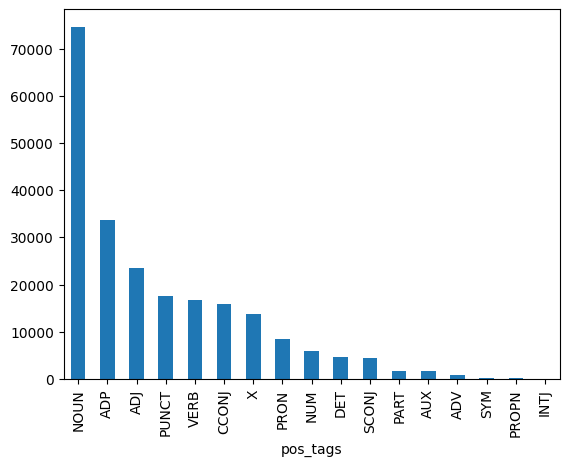

In [13]:
df2['pos_tags'].value_counts().plot.bar()

In [14]:
print(len(df2))

254384


### Can a token have 2 different POS tags?

Short answer: **Yes!**

#### Long answer:

In [15]:
t_d={}
for i in range(len(df2)):
    if df2["tokens"][i] in t_d.keys():
        t_d[df2["tokens"][i]].append(df2["pos_tags"][i])
    else:
        t_d[df2["tokens"][i]]=[]
counter = 20
sum=0
for i in t_d.keys():
    c=len(set(t_d[i]))
    if c>1:
        sum+=1
        if counter>0:
            counter-=1
            print(i,set(t_d[i]))
print("total",sum)

اميركية {'X', 'ADJ'}
على {'X', 'NOUN', 'ADP'}
الالمانية {'NOUN', 'ADJ'}
ب {'X', 'ADP'}
الاحد {'X', 'NOUN'}
ام {'CCONJ', 'X'}
في {'X', 'ADP'}
عدد {'X', 'VERB', 'NOUN'}
ها {'DET', 'PRON', 'PART'}
الصادر {None, 'ADJ'}
ان {'SCONJ', 'X', 'PART', 'VERB'}
الاميركية {'X', 'NOUN', 'ADJ'}
جنرال {'X', 'NOUN'}
ل {'CCONJ', 'X', 'PART', 'ADP'}
عبر {'VERB', 'ADP'}
الاسبانية {'X', 'NOUN', 'ADJ'}
و {'CCONJ', 'X'}
/ {'PUNCT', 'SYM'}
الماضي {'NOUN', 'ADJ'}
التي {'DET', 'X'}
total 1584


## 3. Modelling

Given the answer for the question above, we defently know that we need a sequential model, but fo the sake of just exploring 

In [ ]:
!pip install networkx

In [16]:
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, SimpleRNN
from tensorflow.keras.models import Sequential
import networkx as nx
import matplotlib.pyplot as plt

2024-08-15 09:21:28.210969: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 09:21:28.211089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 09:21:28.329780: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Pre-Processing

In [17]:
def get_numbers(df):
    # Convert tokens and POS tags to numeric representation
    vocab = set([word for sentence in df["sent"] for word in sentence])
    pos_tag_set = set([tag for tags in df["pos_tags"] for tag in tags])

    word2idx = {w: i + 1 for i, w in enumerate(vocab)}
    pos2idx = {t: i for i, t in enumerate(pos_tag_set)}
    idx2pos = {i: t for i, t in enumerate(pos_tag_set)}

    return [[word2idx[token] for token in sentence] for sentence in df["sent"]],\
           [[pos2idx[tag] for tag in tags] for tags in df["pos_tags"]], vocab, pos_tag_set

In [18]:
X, Y, vocab, pos_tag_set = get_numbers(df)
dev_X, dev_Y, _, _ = get_numbers(dev_df)
test_X, test_Y, _, _ = get_numbers(test_df)

In [19]:
X[0], Y[0]

([12682,
  33488,
  28788,
  25514,
  29390,
  3881,
  32797,
  17109,
  3694,
  9452,
  13804,
  9452,
  13640],
 [14, 5, 6, 6, 2, 16, 6, 6, 6, 7, 14, 7, 2])

#### Determine the length of the longest sentence

In [20]:
# Pad sequences to have same length
max_len=478

X_padded =pad_sequences(X, maxlen=max_len, padding='post')
Y_padded =pad_sequences(Y, maxlen=max_len, padding='post')

dev_X_padded=pad_sequences(dev_X, maxlen=max_len, padding='post')
dev_Y_padded = pad_sequences(dev_Y, maxlen=max_len, padding='post')

test_X_padded=pad_sequences(test_X, maxlen=max_len, padding='post') 
test_Y_padded=pad_sequences(test_Y, maxlen=max_len, padding='post')

In [21]:
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

### RNN

In [47]:
model = Sequential([
        Embedding(input_dim=len(vocab) + 1, output_dim=8),
        SimpleRNN(16, return_sequences=True),
        Dense(len(pos_tag_set), activation='softmax')
    ])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_padded, Y_padded, epochs=2, batch_size=64)

Epoch 1/2
 5/95 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5548 - loss: 2.5614

W0000 00:00:1723716070.644219     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.8783 - loss: 0.9698
Epoch 2/2
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9354 - loss: 0.2787


### Simple vis

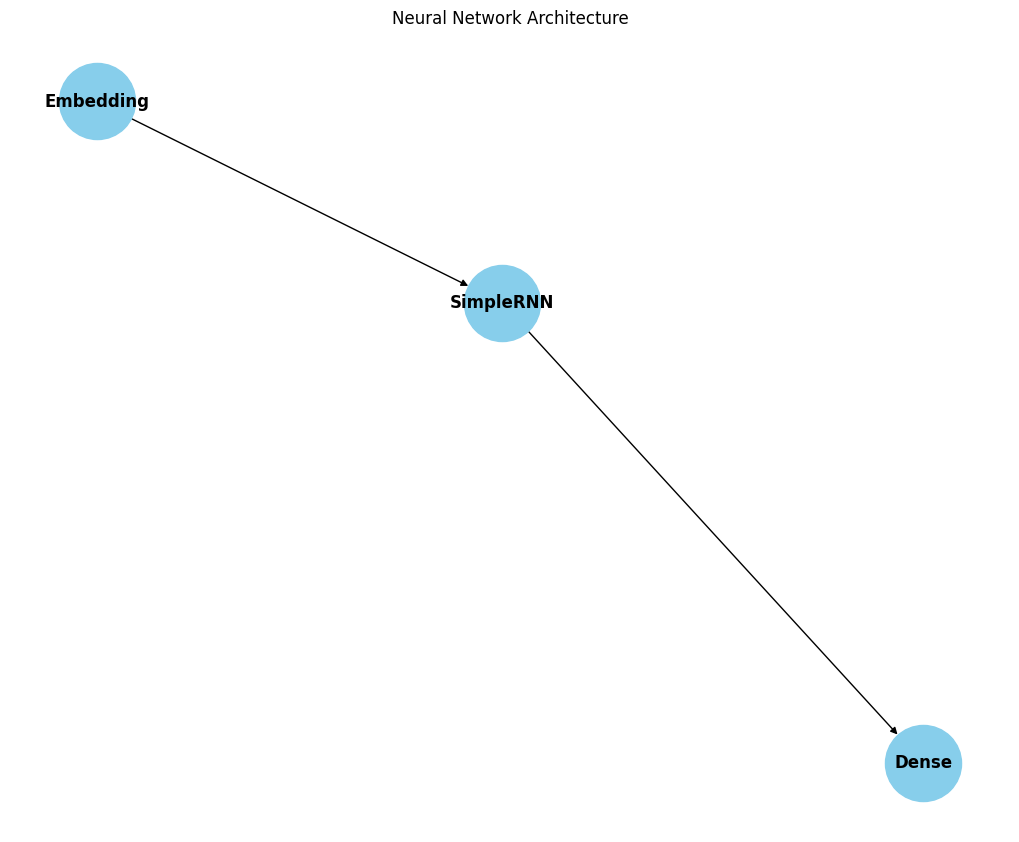

In [41]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for each layer in the model
for i, layer in enumerate(model.layers):
    G.add_node(i, label=layer.__class__.__name__)

# Add edges between consecutive layers
for i in range(len(model.layers) - 1):
    G.add_edge(i, i + 1)

# Set up node labels
labels = nx.get_node_attributes(G, 'label')

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout algorithm for the graph
nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)
plt.title("Neural Network Architecture")
plt.show()


### More detailed look

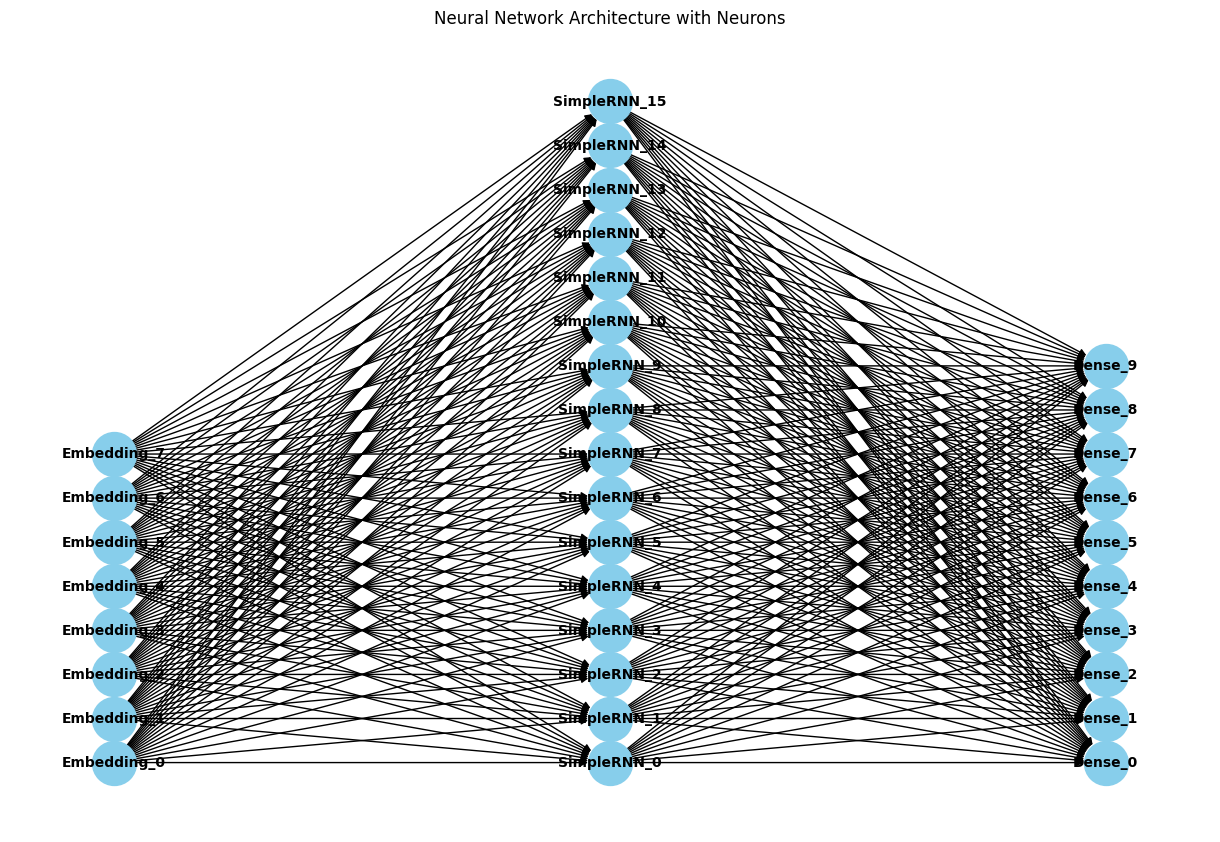

In [46]:
# Create a directed graph
G = nx.DiGraph()

# Parameters for the visualization
layer_neurons = {
    'Embedding': 8,        # 8 output dimensions for the Embedding layer
    'SimpleRNN': 16,        # 16 neurons for the SimpleRNN layer
    'Dense': pos_tag_size   # Number of outputs for the final Dense layer
}

# Assign neuron indices for each layer
layer_names = ['Embedding', 'SimpleRNN', 'Dense']
layer_positions = {}  # To store the position of neurons in layers

for i, layer_name in enumerate(layer_names):
    num_neurons = layer_neurons[layer_name]
    for j in range(num_neurons):
        neuron_name = f"{layer_name}_{j}"
        G.add_node(neuron_name, label=f"{layer_name} {j}")
        layer_positions[neuron_name] = (i, j)  # Store the position for layout

# Add edges between consecutive layers
for i in range(len(layer_names) - 1):
    current_layer = layer_names[i]
    next_layer = layer_names[i + 1]
    for j in range(layer_neurons[current_layer]):
        for k in range(layer_neurons[next_layer]):
            G.add_edge(f"{current_layer}_{j}", f"{next_layer}_{k}")

# Create a layout where layers are placed horizontally and neurons vertically
pos = {}
for node, (layer_idx, neuron_idx) in layer_positions.items():
    pos[node] = (layer_idx, neuron_idx)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title("Neural Network Architecture with Neurons")
plt.show()

In [44]:
evaluate_model(model, dev_X_padded, dev_Y_padded)
evaluate_model(model, test_X_padded, test_Y_padded)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9445 - loss: 0.2565
Test Loss: 0.2631394565105438
Test Accuracy: 0.9430221915245056
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9240 - loss: 0.3479
Test Loss: 0.32247394323349
Test Accuracy: 0.9303408265113831


### LSTM

I tried simple LSTM models with variant hyper-parameters -including #nodes, batch_size, and #epochs- and  the best that I got was 79.69% training accuracy 81.92% dev accuracy and 69.09% test accuracy<br>
I tried the same simple LSTM models with variant hyper-parameters and the best that I got was 91.58% training accuracy 92.39% dev accuracy and 90.46% test accuracy.<br> 
The only difference between the first batch of experiments and the second ones was the `maxlen` provided to the `pad_sequences` function, as in the first no.of experiments `maxlen = 150` and in the second batch of experiments  `maxlen = 478` where 478 is the length of the biggest sequence in the training dataset.

In [ ]:
# Build LSTM model
model = Sequential([
        Embedding(input_dim=len(vocab) + 1, output_dim=16),
        LSTM(32, return_sequences=True),
        TimeDistributed(Dense(len(pos_tag_set), activation='softmax'))
    ])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train model
history = model.fit(X_padded, Y_padded, epochs=2, batch_size=64)

In [ ]:
evaluate_model(model, dev_X_padded, dev_Y_padded)
evaluate_model(model, test_X_padded, test_Y_padded)

## Acknowledgements:
1. orginal dataset https://github.com/UniversalDependencies/UD_Arabic-PADT
2. Nada Alswah https://www.kaggle.com/code/nadaalswah/arabic-pos-with-lstm